<b><font size=20, color='#A020F0'>Class Notebook 4

## Welcome to your fourth in-class jupyter notebook activity!
In this notebook you'll get more practice with xarray. We'll be using data from the [World Ocean Atlas 2018](https://www.ncei.noaa.gov/products/world-ocean-atlas) (WOA18), which is a global gridded data product derived from oceanographic data from the [World Ocean Database](https://www.ncei.noaa.gov/products/world-ocean-database). And yes, I _know_ it's more oceanography this time, but your homework uses ERA5 data, and next week I think we'll use some sea ice data and data from MERRA2 (no promises though) :)

---

<b><font color='red'>Due Date: 15 October 2021</font></b><br>(by the end of class)

<b>How you will turn in this assignment</b><br> When you are ready to turn in your notebook, do the following:
1. Save your notebook and make sure your results are visible (cells have been executed)
2. Open a terminal and navigate to your local `AOS573` repository
3. If you haven't done so, move your completed in-class notebook into your InClass directory (if you opened and worked on the notebook from this directory you don't need to do anything).
4. Use `git add` and `git commit -m` to add and commit ClassNotebook4 to your local `AOS573` git repository (<font color='red'>_DO NOT ADD THE WOA18 NETCDF FILE!_</font>)
5. `push` your changes to your remote `aos573_completed_assignments` repository: `git push finished_work main` (you'll need to enter your username and personal access token)
6. <b><font color='red'><u>DELETE YOUR LOCAL COPY OF THE WOA18 DATA!

---

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

## 1. Reading in and exploring your data
The data for this notebook is in the following directory: `/tornado/home1/class/fall21/zanowski/Notebook_data`

Copy the WOA18 data to your home directory (if you put it in your AOS573 directory, <b><font color='red'>_DO NOT_</b></font> add and commit the netCDF file!) <br>

### 1.1 Use xarray to read in the file 'WOA18.nc'

In [2]:
ds=xr.open_dataset('../../AOS573/aos573_testbed/WOA18.nc')
ds

<xarray.Dataset>
Dimensions:     (lat: 180, nbounds: 2, lon: 360, depth: 102)
Coordinates:
  * lat         (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth       (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Dimensions without coordinates: nbounds
Data variables:
    lat_bnds    (lat, nbounds) float32 ...
    lon_bnds    (lon, nbounds) float32 ...
    depth_bnds  (depth, nbounds) float32 ...
    t_an        (depth, lat, lon) float32 ...
    s_an        (depth, lat, lon) float32 ...
    I_an        (depth, lat, lon) float32 ...
    o_an        (depth, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

### 1.2 Understanding your data
1. What data variables exist in your dataset and what do they represent? (You can ignore variables ending in _bnds)
2. What are the coordinates of the variables ending in _an?
3. What is the range of values for each coordinate in your dataset?

In [10]:
for var in ['t_an','s_an','I_an','o_an']:
    print(ds[var].attrs['standard_name']+': '+ds[var].attrs['long_name']+'\n')

sea_water_temperature: Objectively analyzed mean fields for sea_water_temperature at standard depth levels.

sea_water_salinity: Objectively analyzed mean fields for sea_water_salinity at standard depth levels.

sea_water_sigma: Objectively analyzed mean fields for sea_water_sigma at standard depth levels.

mole_concentration_of_dissolved_molecular_oxygen_in_sea_water: Objectively analyzed mean fields for mole_concentration_of_dissolved_molecular_oxygen_in_sea_water at standard depth levels.



In [11]:
print(ds.coords)

Coordinates:
  * lat      (lat) float32 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03


In [12]:
print(ds.depth[0].values,ds.depth[-1].values)
print(ds.lat[0].values,ds.lat[-1].values)
print(ds.lon[0].values,ds.lon[-1].values)

0.0 5500.0
-89.5 89.5
-179.5 179.5


### 1.3 Visualize your data
Make a 2x2 panel of plots showing temperature, salinity, sigma (sigma=density-1000), and oxygen at the ocean surface. These plots need not be pretty--they should just help you get a sense of what your data actually look like.

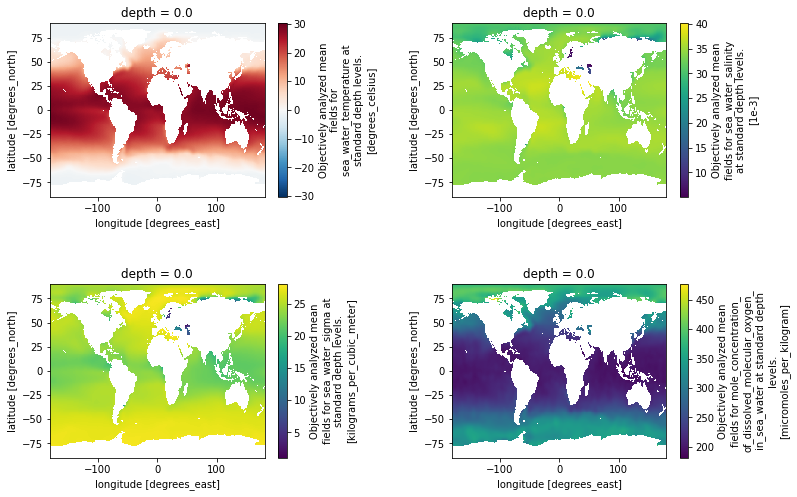

In [13]:
fig,ax=plt.subplots(2,2)
fig.set_size_inches(12,8)
axs=ax.flatten()
for i,var in enumerate(['t_an','s_an','I_an','o_an']):
    ds[var].sel(depth=0).plot(ax=axs[i])
plt.subplots_adjust(hspace=0.5,wspace=0.5)                       

### 1.4 Making a land mask
Use np.isnan() to make a land mask and add it to your dataset

In [3]:
land=np.isnan(ds.t_an)
ds['land']=land
ds

<xarray.Dataset>
Dimensions:     (lat: 180, nbounds: 2, lon: 360, depth: 102)
Coordinates:
  * lat         (lat) float32 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon         (lon) float32 -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth       (depth) float32 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Dimensions without coordinates: nbounds
Data variables:
    lat_bnds    (lat, nbounds) float32 -90.0 -89.0 -89.0 ... 89.0 89.0 90.0
    lon_bnds    (lon, nbounds) float32 -180.0 -179.0 -179.0 ... 179.0 180.0
    depth_bnds  (depth, nbounds) float32 0.0 2.5 2.5 ... 5.45e+03 5.5e+03
    t_an        (depth, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    s_an        (depth, lat, lon) float32 ...
    I_an        (depth, lat, lon) float32 ...
    o_an        (depth, lat, lon) float32 ...
    land        (depth, lat, lon) bool True True True True ... True True True
Attributes: (12/49)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R. A., A. V. Mishonov, O. K. ...
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    ...                              ...
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-28 
    date_modified:                   2019-07-28

---

## 2. Working with your data

### 2.1 Creating basin zonal means
Compute the zonal mean temperature, salinity, and oxygen in the Atlantic, Pacific, and Indian Oceans. 
For simplicity, use the following longitudes for to define your ocean boundaries:
1. Atlantic: 70W-25E
2. Indian:25E-120E
3. Pacific: 120E-70W (290E)

<b>NOTE:</b> Because the Pacific Ocean is split at the dateline, you will either need to use [roll()]((http://xarray.pydata.org/en/stable/generated/xarray.Dataset.roll.html)) to shift your grid so that you you can grab all of the Pacific Ocean data in one continuous chunk, or you can use [concat()](http://xarray.pydata.org/en/stable/generated/xarray.concat.html) to combine the disparate pieces.

In [4]:
ind=ds.sel(lon=slice(25,120)).mean('lon')
atl=ds.sel(lon=slice(-70,25)).mean('lon')
pac=xr.concat([ds.sel(lon=slice(120,None)),ds.sel(lon=slice(None,-70))],dim='lon').mean('lon')
#pac=pac.reindex(lon=np.arange(120.5,289.6,1.0)) #unnecessary for taking the zonal mean but still good practice

### 2.2 Plotting basin zonal means
Make a 3x3 panel of contour plots showing your zonal means for temperature, salinity, and oxygen in each ocean basin. The columns of the plot should be the individual ocean basins, and the rows the variables. Use [annotate()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html) to place a label at the top of each column of plots with the name of the ocean it represents.

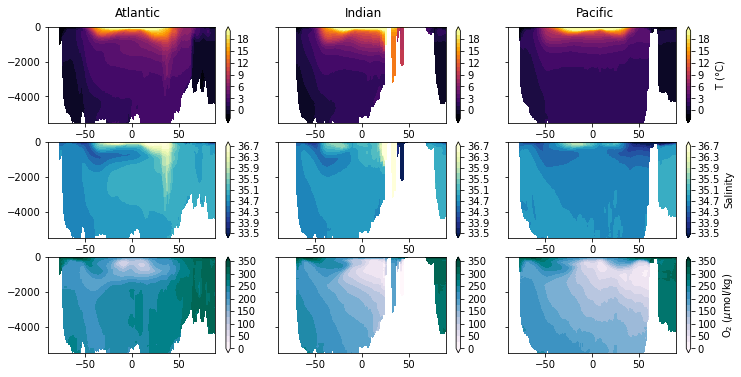

In [13]:
cmaps=[plt.cm.inferno,plt.cm.YlGnBu_r,plt.cm.PuBuGn]
levs=[np.arange(-2,20.1,1),np.arange(33.5,36.7,0.2),np.arange(0,351,25)]
lbs=['T ($\degree$C)','Salinity', 'O$_{2}$ ($\mu$mol/kg)']
fig,ax=plt.subplots(3,3,sharey=True)
fig.set_size_inches(12,6)
axs=ax.flatten()
for m,(var,i,j,k) in enumerate(zip(['t_an','s_an','o_an'],[0,3,6,9],[1,4,7,10],[2,5,8,11])):
    cs1=axs[i].contourf(ds.lat,-ds.depth,atl[var],cmap=cmaps[m],levels=levs[m],extend='both')
    plt.colorbar(cs1,ax=axs[i])
    cs2=axs[j].contourf(ds.lat,-ds.depth,ind[var],cmap=cmaps[m],levels=levs[m],extend='both')
    plt.colorbar(cs2,ax=axs[j])
    cs3=axs[k].contourf(ds.lat,-ds.depth,pac[var],cmap=cmaps[m],levels=levs[m],extend='both')
    plt.colorbar(cs3,ax=axs[k],label=lbs[m])
plt.subplots_adjust(wspace=0.1)
basins=['Atlantic','Indian','Pacific']
for i in range(0,3):
    axs[i].annotate(basins[i],(0.4,1.1),xycoords='axes fraction',fontsize=12)

### 2.3 Practice interpolating
Use [interp()](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.interp.html) to interpolate global surface ocean salinity onto a new latitude and longitude grid defined as the following:<br>
`lat_new=np.arange(-90.0,90.1,1.0)`<br>
`lon_new=np.arange(-180.0,180.1,1.0)`

Plot your result on top of the original land mask like you did in Q1.5. What happens at the land boundaries (you may need to adjust the x and y limits on your plot to zoom in and see the changes)?

In [ ]:
lats=np.arange(-90.0,90.1,1.0)
lons=np.arange(-180,180.1,1.0)
s0=ds.s_an.sel(depth=0)
s0_interp=s0.interp(lat=lats,lon=lons)

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,4))
axs=ax.flatten()
cs1=axs[0].contourf(lons,lats,s0_interp,levels=np.arange(30,37.5,0.2),extend='both')
plt.colorbar(cs1,ax=axs[0])
axs[1].pcolormesh(lons,lats,land[0],cmap=plt.cm.gray_r)
cs2=axs[1].contourf(lons,lats,s0_interp,levels=np.arange(30,37.5,0.2),extend='both')
plt.colorbar(cs2,ax=axs[1])
axs[1].set_xlim(100,150)
axs[1].set_ylim(-40,0)
#ax.plot(lats,ds.depth,s_zn_mn_cubic,color='orange',lw=1.5,label='cubic')

### 2.4 Calculating Ocean Heat Content

#### 2.4.1 Calculate the ocean heat content above 2000 m
Make a quick plot of your result

Ocean Heat Content is defined as the following, where $\rho$=density, $T$=temperature and $C_{p}$ is the specific heat of seawater, and $h$ is an arbitrary depth:<br>
$OHC=C_{p}\int_{0}^{h}\rho(z)T(z)dz$

Some information that will help:
1. $C_{p}$=3990 J/kg/K
2. $\rho$=$\sigma$+1000

To help get you started, I've set up the code to compute dz:

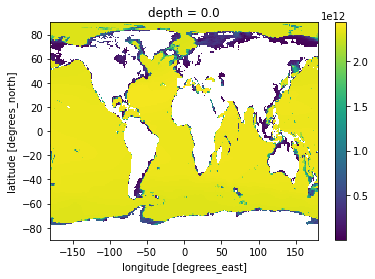

In [20]:
dz=ds.depth_bnds[:,1]-ds.depth_bnds[:,0]
q=(ds.I_an.sel(depth=slice(0,2000))+1000)*(ds.t_an.sel(depth=slice(0,2000))+273.15)*3990*dz.sel(depth=slice(0,2000))
q_int=q.sum('depth')
q_int=q_int.where(land[0]==False)
q_int.plot()

#### 2.4.2 Compute the total ocean heat content above 2000 m by integrating globally
You'll need to compute the area in m$^{2}$ of each grid cell. The radius of the Earth is 6371000 m. The widths and heights of each grid cell are 1˚ in longitude and 1˚ in latitude, respectively. 

In [14]:
lat_spacing=1.0
lon_spacing=1.0
#lat_spacing=ds.lat_bnds[:,1]-ds.lat_bnds[:,0]
#lon_spacing=ds.lon_bnds[:,1]-ds.lon_bnds[:,0]
Rearth=6371000
dy=Rearth*lat_spacing*np.pi/180
dx=Rearth*np.cos(ds.lat*np.pi/180)*lon_spacing*np.pi/180

In [22]:
OHC_tot=(q_int*dx*dy).sum()
OHC_tot

<xarray.DataArray ()>
array(7.54881284e+26)
Coordinates:
    depth    float32 0.0

### 2.5 Finding the depths of maximum temperature and minimum oxygen
For this problem, find the depth of the maximum temperature and the depth of minimum oxygen at each grid cell (each lat/lon point). Your final result for each should be a 2D field of depths that vary spatially across the planet. I've broken down the problem into a few steps below to help:

#### 2.5.1 Create a 3D DataArray for depth and add it to your dataset
Hint: Try using [full_like()](http://xarray.pydata.org/en/stable/generated/xarray.full_like.html)

In [18]:
ds['depth_3D']=ds.depth*xr.full_like(ds.t_an,1)

#### 2.5.2 Use where() on your 3D depths 
Get the depths where the temperature is a maximum at each grid point and then get the depths where oxygen is a minimum at each grid point (these should be separate fields)

In [23]:
depth_of_max_T=ds.depth_3D.where(ds.t_an==ds.t_an.max('depth'))
depth_of_min_ox=ds.depth_3D.where(ds.o_an==ds.o_an.min('depth'))

#### 2.5.3 Turn your 3D DataArrays into 2D arrays
In order to be able to make a contour plot of your depths, you need to turn your 3D answer from above into a 2D array with only dimensions of lat and lon. In this case, because each depth column only has one value and the rest are nans, you can do this easily by summing along depth (xarray ignores nans, so your values shouldn't change).

In [26]:
depth_max_T=depth_of_max_T.sum('depth')
depth_min_ox=depth_of_min_ox.sum('depth')

#### 2.5.4 Remask your results so that land is nan again
When you do computations like this, sometimes the nans for land aren't preserved, but this isn't an issue. We just need to remask our 2D results from 2.4.2 by using where(). The land DataArray is 3D, so use only the masked values at the surface (depth=0). Also note that land is a boolean DataArray where the values for the ocean values = False, so your condition in where() statement should be where land is false.

In [27]:
depth_max_T=depth_max_T.where(ds.land[0]==False) #my land is 3D, so I am only using the land mask at depth=0
depth_min_ox=depth_min_ox.where(ds.land[0]==False)

#or, when you use ~ on a boolean array it means NOT
#depth_max_T=depth_max_T.where(~ds.land[0]) #my land is 3D, so I am only using the land mask at depth=0
#depth_min_ox=depth_min_ox.where(~ds.land[0])

#### 2.5.5 Plot your results
Make a 1x2 set of filled contour plots of your results. What do your results tell you about the depths where temperatures are largest in the polar oceans? Does this seem to make sense based on your plots from 2.2?

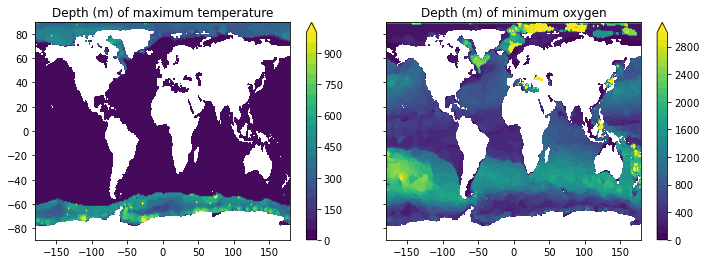

In [28]:
fig,ax=plt.subplots(1,2,sharey=True,figsize=(12,4))
axs=ax.flatten()
cst=axs[0].contourf(ds.lon,ds.lat,depth_max_T,levels=np.arange(0,1001,50),extend='max')
plt.colorbar(cst,ax=axs[0])
axs[0].set_title('Depth (m) of maximum temperature')
cso=axs[1].contourf(ds.lon,ds.lat,depth_min_ox,levels=np.arange(0,3001,100),extend='max')
plt.colorbar(cso,ax=axs[1])
axs[1].set_title('Depth (m) of minimum oxygen')
plt.subplots_adjust(wspace=0.1)